# Notebook to evaluate tomography reconstruction schemes

1. <a href='#import'>Import</a>
    - Import necessary modules (numpy, scipy, matplotlib, astra and custom)
2. <a href='#eg'>Full example</a>
    - Demonstrate phantom creation, projection and reconstruction
3. <a href='#explore'>Explore</a>
    - Explore and plot a few parts of the code (e.g. projection schemes, algorithms etc.)
4. <a href='#exp'>Experiment</a>
    - Run experiments here (e.g. performance vs collection scheme)
5. <a href='#test'>Test</a>
    - For testing code that hasn't been incorporated into multi_axis yet

## 1. Imports/Function definitions <a id='import'></a>

In [211]:
import matplotlib.pyplot as plt                 # For normal plotting
from mpl_toolkits.mplot3d import proj3d         # For 3D plotting
import matplotlib
import numpy as np                              # For maths
from scipy import ndimage                       # For image rotations
from scipy import optimize                      # For function minimization
import astra                                    # For tomography framework
import copy                                     # For deep copying arrays
import tomopy                                   # For 3D Shepp-Logan phantom

import RegTomoReconMulti as rtr                 # Modified version of Rob's CS code
import multi_axis                               # My custom functions

## 2. Full example <a id='eg'></a>

### All-in-one

In [8]:
# Make phantom
X,Y,Z,P = multi_axis.generate_pillar_cavities()

# Add noise
Pn = multi_axis.noisy(P,noise_typ='poisson',val_pois=300)
Pn = multi_axis.noisy(Pn,noise_typ='gauss',g_var=.01)
Pn = multi_axis.noisy(Pn,noise_typ='s&p',p_sp=0.005)

# Reconstruct
R = multi_axis.full_tomo(P,Pn)

 Iter   Time      primal          gap        violation       step     
   0%     0s     1.025e+04     1.000e+00          0        0.000e+00  
  16%     7s     5.050e+01    -9.407e-03     4.869e-03     1.713e-02  
  33%    15s     4.842e+01     4.511e-03     2.770e-03     6.461e-03  
  50%    22s     4.774e+01    -1.671e-03     2.118e-03     3.159e-03  
  66%    29s     4.754e+01    -1.369e-03     3.478e-03     2.012e-03  
  83%    37s     4.741e+01    -3.369e-04     9.872e-04     1.353e-03  
 100%    44s     4.735e+01    -6.881e-04     1.105e-03     1.015e-03  



In [ ]:
# Compare
multi_axis.compare_ortho(P,R[0],ax=90)

### Separated stages

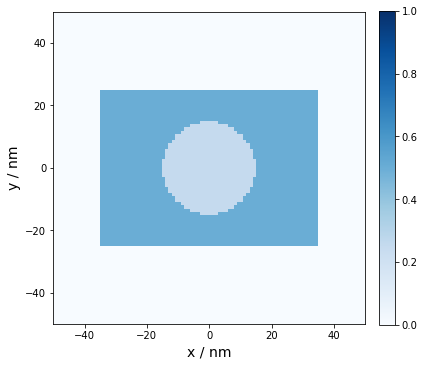

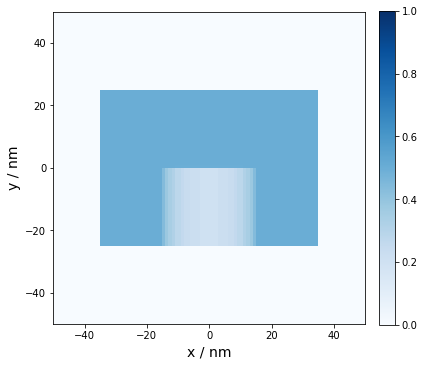

In [2]:
# Generate phantom
#X,Y,Z,P = multi_axis.generate_tri_pris()
#X,Y,Z,P = multi_axis.generate_tetrapod(r_tet=50,r_cyl=6)
X,Y,Z,P = multi_axis.generate_pillar_cavities()
#X,Y,Z,P = multi_axis.generate_sphere()
#X,Y,Z,P = multi_axis.generate_layered_rod()

Pn = multi_axis.noisy(P,noise_typ='poisson',val_pois=300)
Pn = multi_axis.noisy(Pn,noise_typ='gauss',g_var=.01)
Pn = multi_axis.noisy(Pn,noise_typ='s&p',p_sp=0.005)
Pn = P

# View in 2D
multi_axis.plot_2d(X,Y,Z,Pn)

# Rotate 90 about +x and view again
Pr = multi_axis.rotate_bulk(Pn,90,0,0)
multi_axis.plot_2d(X,Y,Z,Pr)

In [3]:
# Generate projection data
angles = multi_axis.generate_angles(mode='x',alpha=90,tilt2='beta')
raw_data = multi_axis.generate_proj_data(Pn,angles)
vectors = multi_axis.generate_vectors(angles)

In [4]:
# Perform reconstruction
recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm='TV1',niter=300,callback_freq=20,weight=0.001)

 Iter   Time      primal          gap        violation       step     
   0%     4s     1.036e+04     1.000e+00          0        0.000e+00  
   6%    12s     5.544e+00     8.060e-02     1.014e-02     1.406e-01  
  13%    15s     4.092e+00    -1.582e-01     2.624e-03     2.797e-02  
  20%    18s     3.896e+00    -1.077e-01     2.009e-03     1.426e-02  
  26%    22s     3.791e+00    -8.572e-02     1.546e-03     1.077e-02  
  33%    25s     3.725e+00    -7.479e-02     1.141e-03     9.313e-03  
  40%    28s     3.683e+00    -6.658e-02     9.130e-04     8.905e-03  
  46%    32s     3.656e+00    -5.883e-02     7.424e-04     7.918e-03  
  53%    35s     3.638e+00    -4.996e-02     6.010e-04     7.197e-03  
  60%    38s     3.627e+00    -4.167e-02     5.175e-04     6.478e-03  
  66%    42s     3.620e+00    -3.422e-02     4.426e-04     5.684e-03  
  73%    45s     3.616e+00    -2.758e-02     3.723e-04     4.932e-03  
  80%    48s     3.613e+00    -2.219e-02     3.082e-04     4.362e-03  
  86% 

In [5]:
# Match orientation of reconstruction to phantom
recon_vector = multi_axis.reorient_reconstruction(recon)

Phantom error:  0.011439276004518032 COD:  0.999845270714
Phantom error:  0.011439276004518032 COD:  0.999845270714


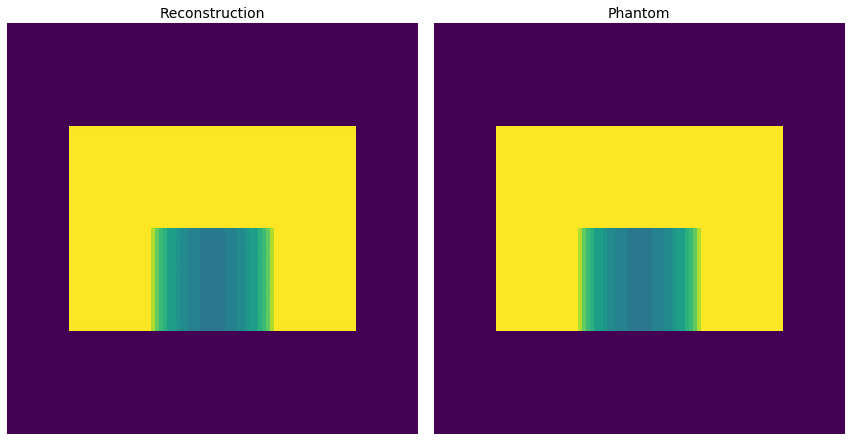

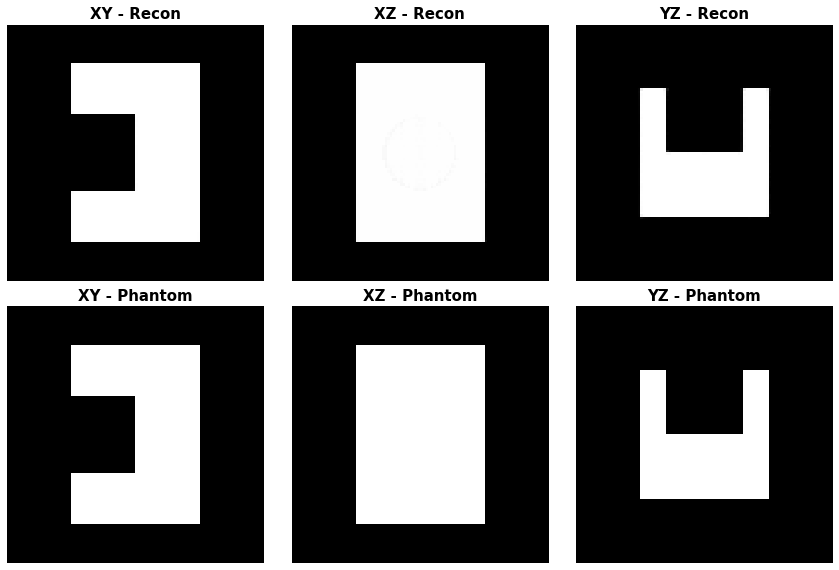

In [7]:
# Compare reconstruction to original
multi_axis.compare_projection(recon_vector,P,ax=90)
multi_axis.compare_ortho(P,recon_vector,ax=90)

## 3. Explore <a id='explore'></a>

### Plot Phantoms

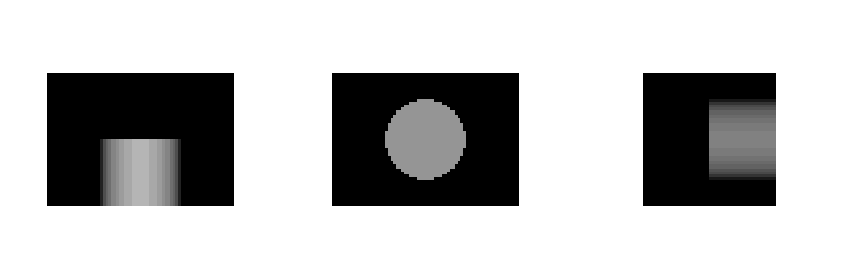

In [45]:
# Plot each phantom

#X,Y,Z,P = multi_axis.generate_tri_pris()
#X,Y,Z,P = multi_axis.generate_tetrapod()
X,Y,Z,P = multi_axis.generate_pillar_cavities()
#X,Y,Z,P = multi_axis.generate_sphere()
#X,Y,Z,P = multi_axis.generate_layered_rod()
#P = tomopy.misc.phantom.shepp3d(size=100)
Pn = P
#Pn = multi_axis.noisy(P,noise_typ='poisson',val_pois=1)

fig= plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax2.imshow(np.flipud(np.mean(Pn,axis=2).T),cmap='Greys')
ax1.imshow(np.flipud(np.mean(multi_axis.rotate_bulk(Pn,90,0,0),axis=2).T),cmap='Greys')
ax3.imshow(np.flipud(np.mean(multi_axis.rotate_bulk(Pn,0,90,0),axis=2).T),cmap='Greys')

ax1.axis('off'),ax2.axis('off'),ax3.axis('off')
plt.tight_layout()

### Plot collection schemes

In [31]:
%matplotlib qt
%matplotlib qt
plt.figure()


<Figure size 432x288 with 0 Axes>

(-1, 1)

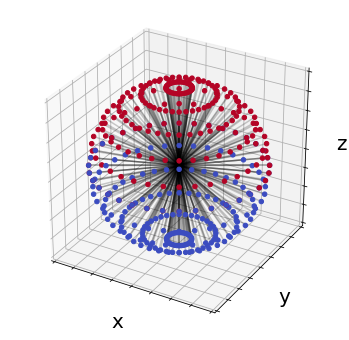

In [10]:
# plot a collection scheme
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax1 = fig.gca(projection='3d')


angles = multi_axis.generate_angles(mode='dist',alpha=90,beta=40,gamma=180,tilt2='gamma',n_tilt=180+18,dist_n2=18)

bs = []
for i,a in enumerate(angles):
    mrot = multi_axis.rotation_matrix(a[0],a[1],a[2])
    b = np.dot(mrot,[0,0,1])
    bs.append(b)
    plt.plot([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],'-',color='k',alpha=.2)
    ax1.scatter([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],c=[-b[2],b[2]],s=20,cmap='coolwarm',alpha=1)

ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_zticklabels([])
plt.xlabel('x',fontsize='20')
plt.ylabel('y',fontsize='20')
ax1.set_zlabel('z',fontsize='20')
plt.xlim([-1,1])
plt.ylim([-1,1])
ax1.set_zlim([-1,1])

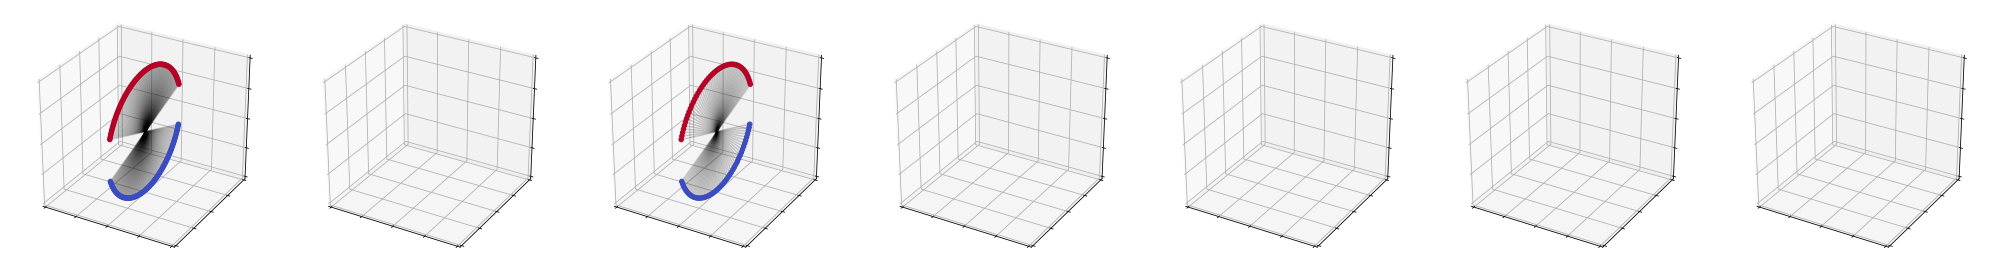

In [98]:
# Plot all

fig= plt.figure(figsize=(28,4))
ax1 = fig.add_subplot(1, 7, 1, projection='3d')
ax2 = fig.add_subplot(1, 7, 2, projection='3d')
ax3 = fig.add_subplot(1, 7, 3, projection='3d')
ax4 = fig.add_subplot(1, 7, 4, projection='3d')
ax5 = fig.add_subplot(1, 7, 5, projection='3d')
ax6 = fig.add_subplot(1, 7, 6, projection='3d')
ax7 = fig.add_subplot(1, 7, 7, projection='3d')

modes = ['x','y','dual','quad','sync','dist','rand']
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]
for i,m in enumerate(modes):
    ax = axs[i]
    angles = multi_axis.generate_angles(mode=m,tilt2='gamma',n_tilt=100)

    bs = []
    for i,a in enumerate(angles):
        mrot = multi_axis.rotation_matrix(a[0],a[1],a[2])
        b = np.dot(mrot,[0,0,1])
        bs.append(b)
        ax.plot([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],'-',color='k',alpha=.2)
        ax.scatter([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],c=[-b[2],b[2]],s=20,cmap='coolwarm',alpha=1)

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_zticklabels([])
    # plt.xlabel('x',fontsize='20')
    # plt.ylabel('y',fontsize='20')
    # ax1.set_zlabel('z',fontsize='20')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    
plt.tight_layout()

## Plot algorithms

In [25]:
algs = ['BP3D_CUDA','SIRT3D_CUDA','TV1']

X,Y,Z,P = multi_axis.generate_tetrapod()

Pn = multi_axis.noisy(P,noise_typ='poisson',val_pois=300)
Pn = multi_axis.noisy(Pn,noise_typ='gauss',g_var=.01)
Pn = multi_axis.noisy(Pn,noise_typ='s&p',p_sp=0.005)

# Generate projection data
angles = multi_axis.generate_angles()
raw_data = multi_axis.generate_proj_data(Pn,angles)
vectors = multi_axis.generate_vectors(angles)

#recon
recons = []
for alg in algs:
    recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm=alg)
    recon_vector = multi_axis.reorient_reconstruction(recon)
    recons.append(recon_vector)

Started reconstruction... Finished after 1 s


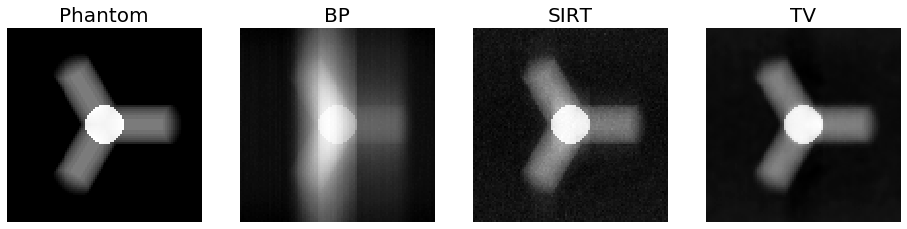

In [34]:
fig= plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)
c='Greys_r'
ax1.imshow(np.flipud(np.mean(P,axis=2).T),cmap=c)
ax2.imshow(np.flipud(np.mean(recons[0],axis=2).T),cmap=c)
ax3.imshow(np.flipud(np.mean(recons[1],axis=2).T),cmap=c)
ax4.imshow(np.flipud(np.mean(recons[2],axis=2).T),cmap=c)

ax1.set_title('Phantom',fontsize=20)
ax2.set_title('BP',fontsize=20)
ax3.set_title('SIRT',fontsize=20)
ax4.set_title('TV',fontsize=20)

for ax in [ax1,ax2,ax3,ax4]:
    ax.axis('off')

## Fourier space fill

### Single demo

In [162]:
def calculate_spacefill(angles,range_n=100,size_n=1):
    """ For a given set of projection angles and resolution,
    calculates the percentage of voxels in fourier space with data """
    normals = []
    for a in angles:
        mrot = multi_axis.rotation_matrix(a[0],a[1],a[2])
        n = np.dot(mrot,[0,0,1])
        normals.append(n)

    xs = np.linspace(-range_n/2,range_n/2,int(range_n/size_n))
    ys = np.linspace(-range_n/2,range_n/2,int(range_n/size_n))
    zs = np.linspace(-range_n/2,range_n/2,int(range_n/size_n))
    X,Y,Z = np.meshgrid(xs,ys,zs,indexing='ij')

    res = (xs[-1]-xs[-2])

    shape = np.shape(X)
    ic = [0,0,0] #coordinates of centre
    P = np.zeros_like(X)
    for ix,x in enumerate(xs):
        for iy,y in enumerate(ys):
            for iz,z in enumerate(zs):
                for n in normals:
                    plane = n[0]*x+n[1]*y+n[2]*z
                    #print(plane)
                    if abs(plane) <= res:
                        P[ix,iy,iz] = 1
    fill = np.sum(P)/np.sum(np.ones_like(P))
    return fill,P

In [189]:
angles = multi_axis.generate_angles(mode='x',n_tilt=5,alpha=40)
f,P = calculate_spacefill(angles,range_n=100,size_n=5)
f

0.47999999999999998

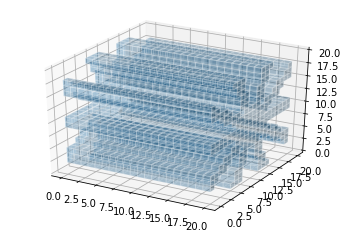

In [190]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 1
ax.voxels(P[::s,::s,::s], edgecolor=(1,1,1,0.2),alpha=.2)
R = np.ones_like(P)-P
#ax.voxels(R[::s,::s,::s], edgecolor=(1,1,1,0.2),alpha=.2,color='r')
plt.show()

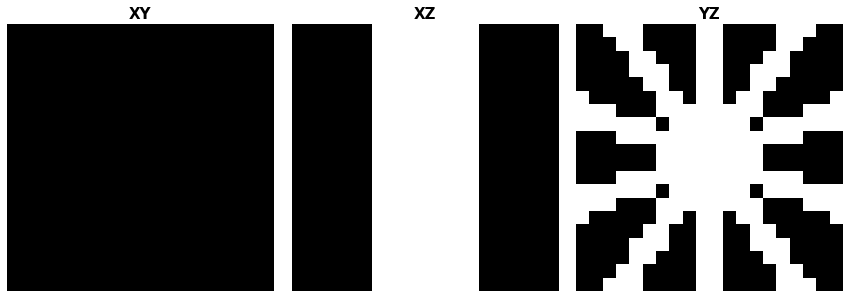

In [191]:
multi_axis.plot_orthoslices(P)

### Missing wedge calculations

Text(0.5, 1.0, 'Missing wedge (2D)')

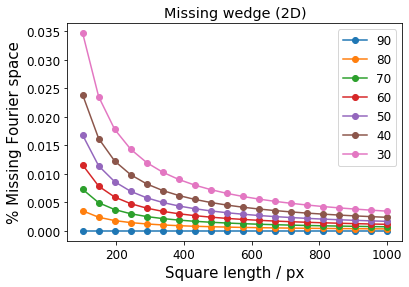

In [269]:
# 2d
alphas = [90,80,70,60,50,40,30]
n = np.linspace(100,1000,20)
a_tot = n**2

for alpha in alphas:
    m = 90-alpha
    a_miss = 2*n*np.tan(m*np.pi/180)
    p = a_miss/a_tot
    plt.plot(n,p,'-o',label=str(alpha))
    
plt.legend()
plt.xlabel('Square length / px',fontsize=15)
plt.ylabel('% Missing Fourier space',fontsize=15)
plt.title('Missing wedge (2D)')

Text(0.5, 1.0, 'Missing cone (3D)')

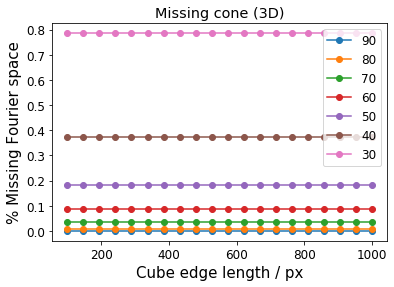

In [302]:
# 3d
alphas = [90,80,70,60,50,40,30]
n = np.linspace(100,1000,20)
#n = np.array([100,200])
v_tot = n**3

#n = np.array([100,200])
ps = []
for alpha in alphas:
    m = 90-alpha
    v_miss = 2*np.pi/3 * (n/2 * np.tan(m*np.pi/180))**2 * n/2
    p = v_miss/v_tot
    ps.append(p)
    plt.plot(n,p,'-o',label=str(alpha))
    
plt.legend()
plt.xlabel('Cube edge length / px',fontsize=15)
plt.ylabel('% Missing Fourier space',fontsize=15)
plt.title('Missing cone (3D)')

Text(0.5, 1.0, 'Missing cone (3D)')

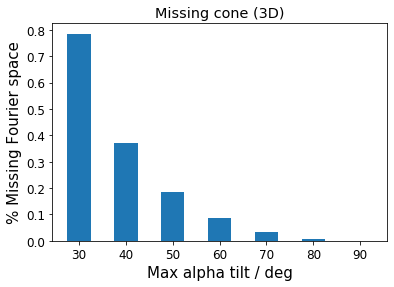

In [309]:
y = np.array(ps)[:,0]
#plt.bar(np.arange(len(y)),y)
plt.bar(alphas,y,width=5)

plt.xlabel('Max alpha tilt / deg',fontsize=15)
plt.ylabel('% Missing Fourier space',fontsize=15)
plt.title('Missing cone (3D)')

## 4. Experiment <a id='exp'></a>

### Space filling experiment

In [310]:
modes = ['x','y','dual','quad','sync','dist','rand']
ns = [10,5,2,1]
fs = []
for n in ns:
    print('\t n: ',n)
    for i,m in enumerate(modes):
        angles = multi_axis.generate_angles(mode=m,alpha=40,tilt2='gamma',n_tilt=40)
        f,_ = calculate_spacefill(angles,range_n=100,size_n=n)
        fs.append(f)
        print(m,f)
        
    np.save('space-fill/n40_a40_g180.npy',fs)

	 n:  10
x 0.68
y 0.68
dual 0.792
quad 0.84
sync 0.736
dist 0.856
rand 0.716
	 n:  5
x 0.55
y 0.55
dual 0.683
quad 0.738
sync 0.618
dist 0.75
rand 0.64375
	 n:  2
x 0.472
y 0.472
dual 0.609024
quad 0.610816
sync 0.510464
dist 0.615808
rand 0.521792
	 n:  1
x 0.444
y 0.444
dual 0.480048
quad 0.462968
sync 0.390256
dist 0.457536
rand 0.410874


Text(0.5, 1.0, '40 projections, $\\alpha \\pm 70^{\\circ} \\gamma \\pm 180^{\\circ} $')

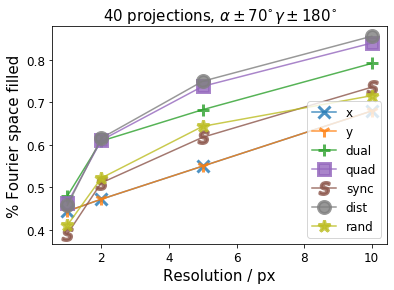

In [311]:
ns = [10,5,2,1]
fs = np.load('space-fill/n40_a40_g180.npy')

plt.rcParams.update({'font.size': 12})
f10 = fs
schemes = ['x','y','dual','quad','sync','dist','rand']
markers = ['x','1','+','s','$S$','o','*']
cmap = matplotlib.cm.get_cmap('tab10')


for i in range(len(modes)):
    c = cmap(i/len(modes))
    plt.plot(ns,fs[i::len(modes)],color=c,marker=markers[i],label=schemes[i],markersize=12,alpha=.8,markeredgewidth=3)
plt.ylabel('% Fourier space filled',fontsize=15)
plt.xlabel('Resolution / px',fontsize=15)
ax = plt.gca()
plt.legend()
plt.title(r'40 projections, $\alpha \pm 70^{\circ} \gamma \pm 180^{\circ} $', fontsize=15)

### Scheme comparison experiment

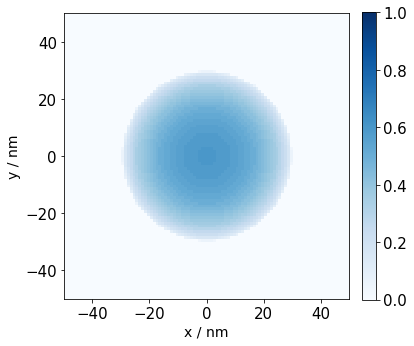

In [13]:
# Generate phantom
X,Y,Z,P = multi_axis.generate_sphere()
#P = tomopy.misc.phantom.shepp3d(size=100)
multi_axis.plot_2d(X,Y,Z,P)

In [14]:
# Beta series
ranges = [(90,90),(70,40),(70,15),(40,40),(40,15)]
for r in ranges:
    a,b = r[0],r[1]
    title = r'Parameter tests/sphere-betas/a%i_b%i.npy' %(a,b)
    print(title)
    
    # Iterate
    results=[]
    for i,scheme in enumerate(['x','y','dual','quad','sync','dist','rand']):
        angles = multi_axis.generate_angles(mode=scheme,alpha=a,beta=b,tilt2='beta')
        # check projections:   Scheme   No. of Proj   Max alpha   Max beta   Max gamma
        print(scheme,'\t',len(angles),'\t',np.max(np.take(angles,0,axis=1)),'\t', \
              np.max(np.take(angles,1,axis=1)),'\t',np.max(np.take(angles,2,axis=1)))

        raw_data = multi_axis.generate_proj_data(P,angles)
        vectors = multi_axis.generate_vectors(angles)
        recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm='TV1',niter=300,callback_freq=50)
        recon_vector = multi_axis.reorient_reconstruction(recon)
        cod = multi_axis.COD(P,recon_vector)
        pe = multi_axis.phantom_error(P,recon_vector)
        results.append([cod,pe])
        print(cod)
        
    np.save(title,results)

Parameter tests/sphere-betas/a90_b90.npy
x 	 40 	 90.0 	 0.0 	 0.0
 Iter   Time      primal          gap        violation       step     
   0%     0s     6.542e+03     1.000e+00          0        0.000e+00  
  16%     7s     2.023e+01     6.746e-03     3.250e-03     7.615e-03  
  33%    14s     1.996e+01     8.887e-03     1.393e-03     3.852e-03  
  50%    22s     1.988e+01     7.026e-03     4.032e-04     2.696e-03  
  66%    29s     1.984e+01     5.498e-03     1.324e-04     2.058e-03  
  83%    36s     1.981e+01     4.401e-03     4.766e-05     1.663e-03  
 100%    44s     1.979e+01     3.609e-03     2.177e-05     1.393e-03  

0.991965804302
y 	 40 	 0.0 	 90.0 	 0.0
 Iter   Time      primal          gap        violation       step     
   0%     0s     6.542e+03     1.000e+00          0        0.000e+00  
  16%     7s     2.023e+01     6.746e-03     3.250e-03     7.615e-03  
  33%    14s     1.996e+01     8.887e-03     1.393e-03     3.852e-03  
  50%    22s     1.988e+01     7.026e-0

In [16]:
# gamma series
ranges = [(90,90),(70,90),(70,45),(40,90),(40,45)]
for r in ranges:
    a,b = r[0],r[1]
    title = r'Parameter tests/sphere-gammas/a%i_g%i.npy' %(a,b)
    print(title)
    
    # Iterate
    results=[]
    for i,scheme in enumerate(['x','y','dual','quad','sync','dist','rand']):
        angles = multi_axis.generate_angles(mode=scheme,alpha=a,gamma=b,tilt2='gamma')
        # check projections:   Scheme   No. of Proj   Max alpha   Max beta   Max gamma
        print(scheme,'\t',len(angles),'\t',np.max(np.take(angles,0,axis=1)),'\t', \
              np.max(np.take(angles,1,axis=1)),'\t',np.max(np.take(angles,2,axis=1)))

        raw_data = multi_axis.generate_proj_data(P,angles)
        vectors = multi_axis.generate_vectors(angles)
        recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm='TV1',niter=300,callback_freq=50)
        recon_vector = multi_axis.reorient_reconstruction(recon)
        cod = multi_axis.COD(P,recon_vector)
        pe = multi_axis.phantom_error(P,recon_vector)
        results.append([cod,pe])
        
    np.save(title,results)

Parameter tests/sphere-gammas/a90_g90.npy
x 	 40 	 90.0 	 0.0 	 0.0
 Iter   Time      primal          gap        violation       step     
   0%     0s     6.542e+03     1.000e+00          0        0.000e+00  
  16%     7s     2.023e+01     6.746e-03     3.250e-03     7.615e-03  
  33%    14s     1.996e+01     8.887e-03     1.393e-03     3.852e-03  
  50%    21s     1.988e+01     7.026e-03     4.032e-04     2.696e-03  
  66%    28s     1.984e+01     5.498e-03     1.324e-04     2.058e-03  
  83%    35s     1.981e+01     4.401e-03     4.766e-05     1.663e-03  
 100%    42s     1.979e+01     3.609e-03     2.177e-05     1.393e-03  

y 	 40 	 90.0 	 0.0 	 90.0
 Iter   Time      primal          gap        violation       step     
   0%     0s     6.542e+03     1.000e+00          0        0.000e+00  
  16%     7s     2.023e+01     6.746e-03     3.250e-03     7.615e-03  
  33%    15s     1.996e+01     8.887e-03     1.393e-03     3.852e-03  
  50%    22s     1.988e+01     7.026e-03     4.032e-

In [44]:
%matplotlib qt
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
# first try
ranges = [(90,90),(70,70),(70,30),(70,5),(50,30),(50,5),(30,30),(30,5)]
for r in ranges:
    a,b = r[0],r[1]
    title = r'Parameter tests/pillar schemes n20 TV1/a%i_b%i.npy' %(a,b)
    print(title)
    
    # Iterate
    n = 20
    results=[]
    for i,scheme in enumerate(['x','y','dual','quad','sync','dist','rand']):
        if i == 5:
            angles = multi_axis.generate_angles(mode=scheme,x_tilt=(-a,a,8),y_tilt=(-b,b,5),rand=(a,b,2*n))
        else:
            angles = multi_axis.generate_angles(mode=scheme,x_tilt=(-a,a,n),y_tilt=(-b,b,n),rand=(a,b,2*n))
        raw_data = multi_axis.generate_proj_data(Pn,angles)
        vectors = multi_axis.generate_vectors(angles)
        recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm='TV1')
        recon_vector = multi_axis.reorient_reconstruction(recon)
        cod = multi_axis.COD(P,recon_vector)
        pe = multi_axis.phantom_error(P,recon_vector)
        results.append([cod,pe])

    np.save(title,results)

Parameter tests/pillar schemes n20 TV1/a90_b90.npy
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 2 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Parameter tests/pillar schemes n20 TV1/a70_b70.npy
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 2 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Parameter tests/pillar schemes n20 TV1/a70_b30.npy
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 2 s
Started reconstruction... Finished af

In [45]:
# plot
%matplotlib qt
%matplotlib qt
#ranges = [(90,90),(70,40),(70,15),(40,40),(40,15)]
ranges = [(90,90),(70,90),(70,45),(40,90),(40,45)]
CODS = []
for r in ranges:
    a,b = r[0],r[1]
    #title = r'Parameter tests/sphere-betas/a%i_b%i.npy' %(a,b)
    title = r'Parameter tests/sphere-gammas/a%i_g%i.npy' %(a,b)
    res = np.load(title)
    cod = res[:,0]
    CODS = np.concatenate((CODS,cod))


fig = plt.figure(figsize=(9,6))

schemes = ['x','y','dual','quad','sync','dist','rand']
markers = ['x','1','+','s','$S$','o','*']

import matplotlib
cmap = matplotlib.cm.get_cmap('tab10')

for i in range(7):
    y = CODS[i::7]
    c = cmap(i/7)
    plt.plot(np.array(y),marker=markers[i],label=schemes[i],markersize=12,alpha=.8,markeredgewidth=3,color=c)
    

plt.legend(bbox_to_anchor=(1,1))
ax = plt.gca()
ax.set_xticks([0,1,2,3,4])
#ax.set_xticklabels(['90-90','70-40','70-15','40-40','40-15'])
ax.set_xticklabels(['90-90','70-90','70-45','40-90','40-45'])
plt.xlabel(r'$\pm$ Tilt ranges ($\alpha$-$\gamma$)')
plt.ylabel('Coefficient of Determination')

plt.rcParams.update({'font.size': 15})
#plt.ylim([.959,1.003])
plt.title('Reconstruction of sphere')

Text(0.5, 1.0, 'Reconstruction of sphere')

In [69]:
data = []
data_avg = []
modes = ['x','y','dual','quad','sync','dist','rand']
for i in range(7):
    y = CODS[i::7]
    data.append(y)
    data_avg.append(np.mean(y))
    
data_avg

[0.97873557688900248,
 0.90145539044795908,
 0.97911507345817983,
 0.98471193437292237,
 0.98403152691657625,
 0.98490879755319427,
 0.9794408968301459]

## 5. Test <a id='test'></a>

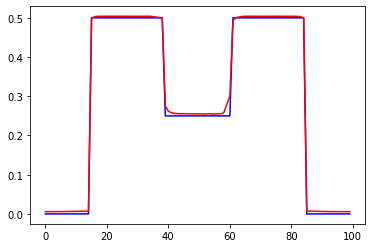

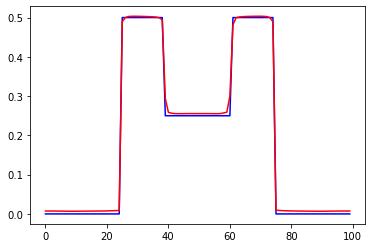

In [45]:
projp = np.mean(P,axis=2)
projr = np.mean(rd[0],axis=2)

plt.plot(projp[:,60],color='b')
plt.plot(projr[:,60],color='r')

plt.figure()
plt.plot(projp[60,:],color='b')
plt.plot(projr[60,:],color='r')

# n=10
# for i in range(n):
#     rot = ndimage.rotate(projr,360*(i/n))
#     print(360*(i/n))
#     plt.plot(rot[:,60])
#     plt.pause(1)

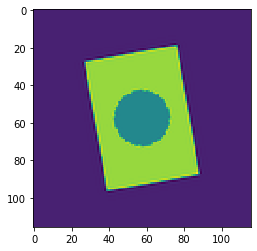

In [25]:
plt.imshow(rot)

In [21]:
X,Y,Z,P = multi_axis.generate_sphere()
P = tomopy.misc.phantom.shepp3d(size=300)

In [26]:
def full_tomo(P,Pn,scheme='x',a=70,b=40,g=180,alg='TV1',tilt2='gamma',angles = None,dist_n2=8,niter=300,n_tilt=40):
    if angles == None:
        angles = multi_axis.generate_angles(mode=scheme,n_tilt=n_tilt,alpha=a,beta=b,gamma=g,tilt2=tilt2,dist_n2=dist_n2)
    raw_data = multi_axis.generate_proj_data(Pn,angles)
    vectors = multi_axis.generate_vectors(angles)
    recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm=alg,niter=niter,callback_freq=50)
    recon_vector = multi_axis.reorient_reconstruction(recon)
    return [recon_vector,raw_data,angles]

In [5]:
import time

In [27]:
r = full_tomo(P,P,scheme='x',a=90,n_tilt=20,dist_n2=18,alg='SIRT3D_CUDA')

In [ ]:
ti = time.time()
r = full_tomo(P,P,scheme='dist',a=90,n_tilt=200,dist_n2=10,alg='SIRT3D_CUDA')
tf = time.time()
print(tf-ti)

shepp logan (128)
x 20 : 0.90336
dist 200 (10) : 0.87773

shepp logan (300)
x 20 :


Phantom error:  0.7926842143193128 COD:  0.723164296187


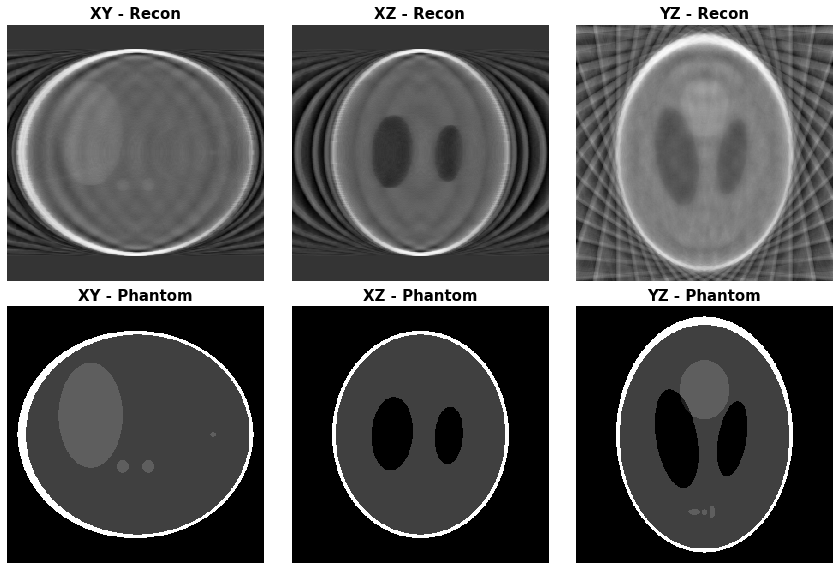

In [28]:
multi_axis.compare_ortho(P,r[0]) # x 20

Phantom error:  0.32538709875010985 COD:  0.877731069125


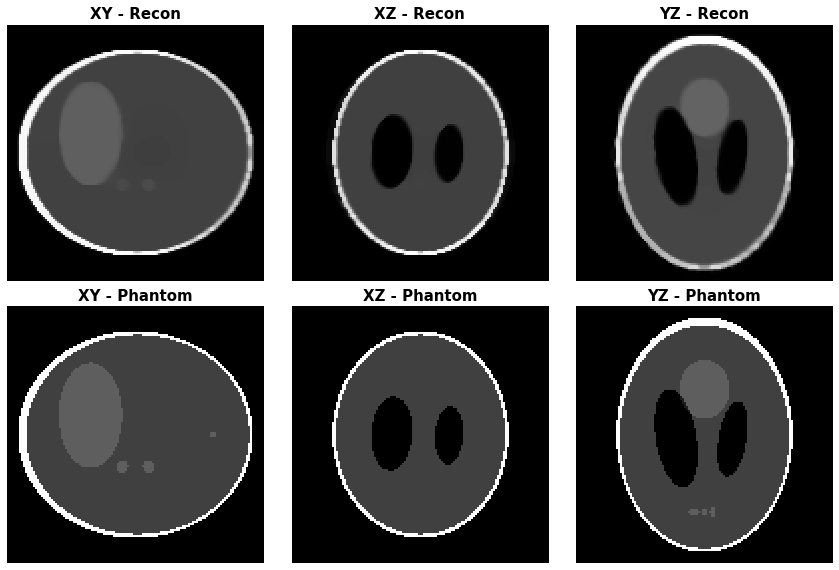

In [20]:
multi_axis.compare_ortho(P,r[0]) # dist 200

Phantom error:  0.10535715927801566 COD:  0.987553519739


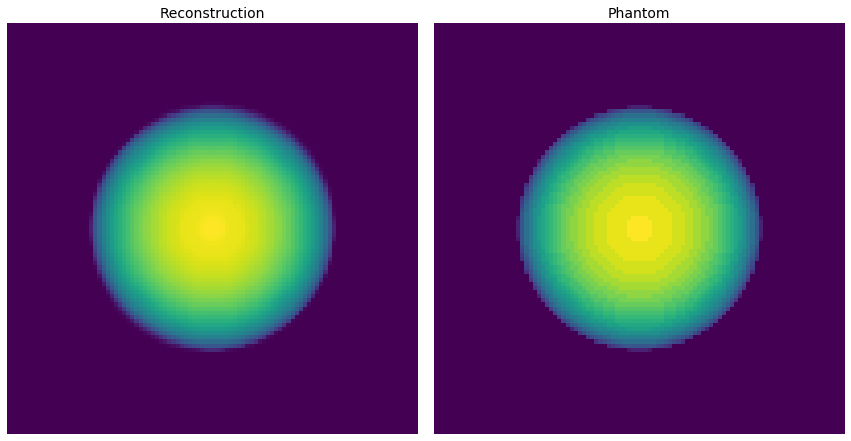

In [13]:
# dist
multi_axis.compare_projection(r[0],P) # dist 40

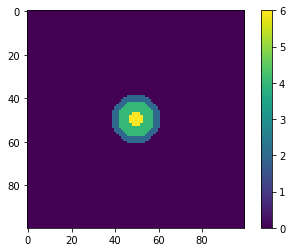

In [30]:
plt.imshow(P[:,:,78]+P[:,:,79]+P[:,:,77]+P[:,:,20]+P[:,:,21]+P[:,:,22])
plt.colorbar()

In [107]:
P = tomopy.misc.phantom.shepp3d(size=100)

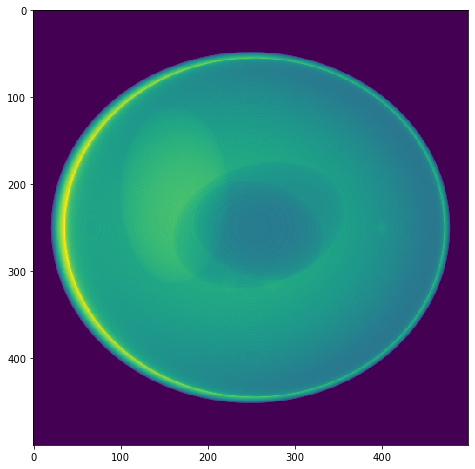

In [82]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.imshow(np.mean(P,axis=2))
#plt.contour(np.mean(P,axis=2),50)

In [159]:
def plot_orthoslices(P,ix=None,iy=None,iz=None,axs=None):
    """ Plot xy,xz,yz orthoslices of a 3d volume
    Plots central slice by default, but slice can be specified """
    if axs == None:
        fig = plt.figure(figsize=(12,4))
        ax1 = fig.add_subplot(1,3,1)
        ax2 = fig.add_subplot(1,3,2)
        ax3 = fig.add_subplot(1,3,3)
    else:
        ax1,ax2,ax3 = axs

    sx,sy,sz = np.shape(P)
    sx2 = int(sx/2)
    sy2 = int(sy/2)
    sz2 = int(sz/2)
    
    if ix != None:
        sx2 = ix
    if iy != None:
        sy2 = iy
    if iz != None:
        sz2 = iz

    ax3.imshow(P[sx2,:,:],cmap='Greys_r')
    ax2.imshow(P[:,sy2,:],cmap='Greys_r')
    ax1.imshow(P[:,:,sz2],cmap='Greys_r')

    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')

    plt.tight_layout()

    ax3.set_title('YZ',fontsize=15,weight='bold')
    ax2.set_title('XZ',fontsize=15,weight='bold')
    ax1.set_title('XY',fontsize=15,weight='bold')
    
    print(np.min(P),np.max(P))

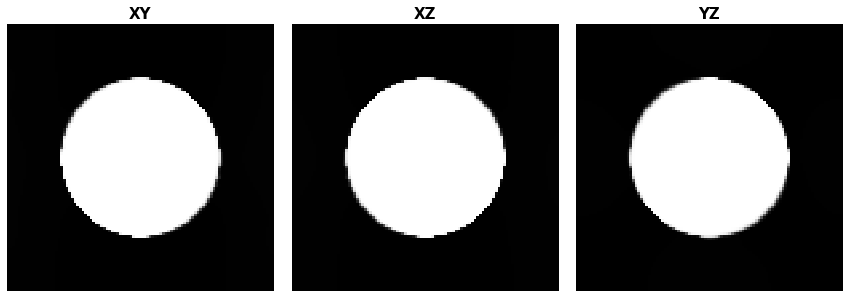

In [158]:
plot_orthoslices(r[0])

In [160]:
def compare_ortho(P,r,ax=0,ay=0,az=0,ix=None,iy=None,iz=None):
    
    Prot = multi_axis.rotate_bulk(P,ax,ay,az)
    rrot = multi_axis.rotate_bulk(r,ax,ay,az)
    
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(2,3,1)
    ax2 = fig.add_subplot(2,3,2)
    ax3 = fig.add_subplot(2,3,3)
    ax4 = fig.add_subplot(2,3,4)
    ax5 = fig.add_subplot(2,3,5)
    ax6 = fig.add_subplot(2,3,6)

    plot_orthoslices(rrot,axs=[ax1,ax2,ax3],ix=ix,iy=iy,iz=iz)
    plot_orthoslices(Prot,axs=[ax4,ax5,ax6],ix=ix,iy=iy,iz=iz)
    
    ax3.set_title('YZ - Recon',fontsize=15,weight='bold')
    ax2.set_title('XZ - Recon',fontsize=15,weight='bold')
    ax1.set_title('XY - Recon',fontsize=15,weight='bold')
    
    ax6.set_title('YZ - Phantom',fontsize=15,weight='bold')
    ax5.set_title('XZ - Phantom',fontsize=15,weight='bold')
    ax4.set_title('XY - Phantom',fontsize=15,weight='bold')
    
    plt.tight_layout()
    print('Phantom error: ',phantom_error(P,r),'COD: ',COD(P,r))

-0.16496663853 1.17504102507
-0.259277990868 1.28356948659


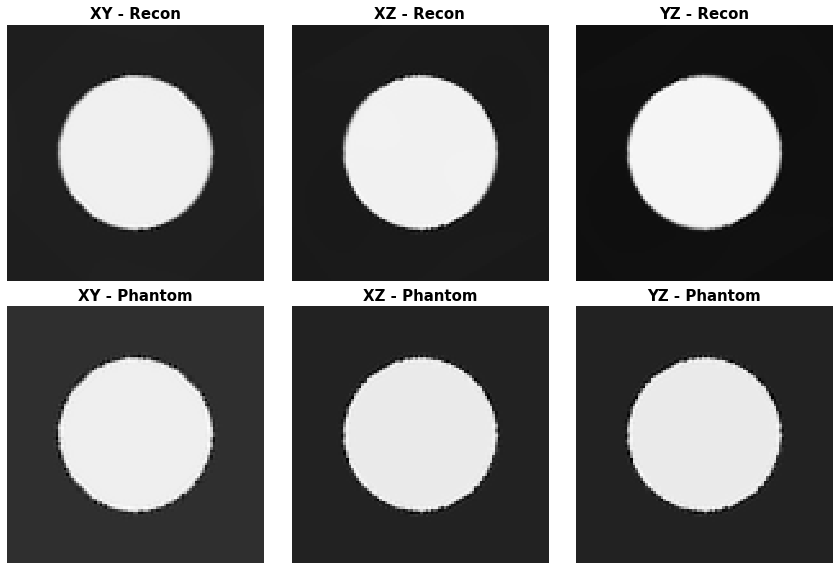

In [173]:
compare_ortho(P,r[0],ax=45,ay=45,az=45)

In [171]:
#prot = multi_axis.rotate_bulk(P,90,0,0)
prot = ndimage.rotate(P,45,axes=(1,2),order=1)
np.min(prot)
plt.imshow()

0.0

In [168]:
prot = ndimage.rotate(P,45,axes=(1,2))

TypeError: rotate() missing 2 required positional arguments: 'input' and 'angle'